In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('dados_sobre_casas.csv')
df.head()

,salario_medio_moradores_regiao,idade_media_casas_regiao,quantidade_media_comodos_regiao,quantidade_media_quartos_regiao,populacao_regiao,valor_casa
0,79545,5,7,4,23086,1059034
1,79248,6,6,3,40173,1505891
2,61287,5,8,5,36882,1058988
3,63345,7,5,3,34310,1260617
4,59982,5,7,4,26354,630943


<Axes: ylabel='Frequency'>

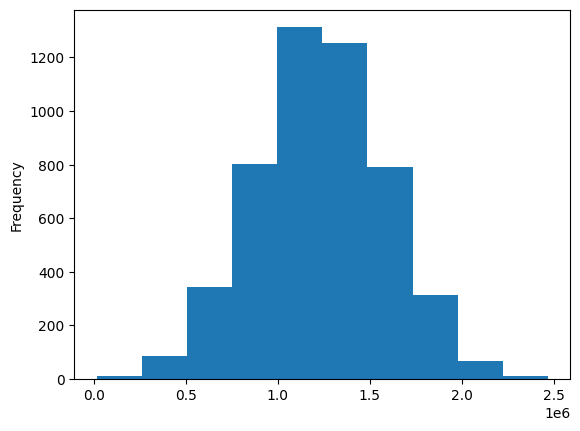

In [3]:
df["valor_casa"].plot(kind="hist")

<Axes: >

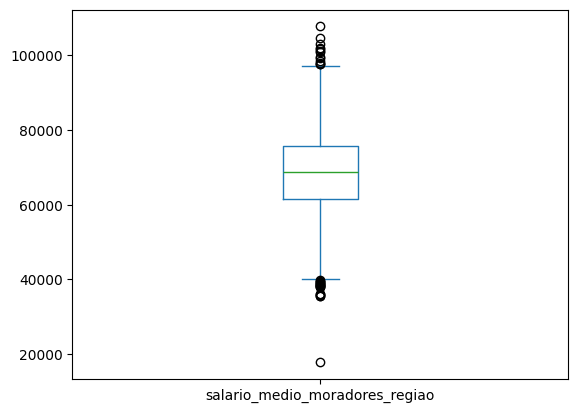

In [4]:
df["salario_medio_moradores_regiao"].plot(kind="box")

<Axes: xlabel='salario_medio_moradores_regiao', ylabel='valor_casa'>

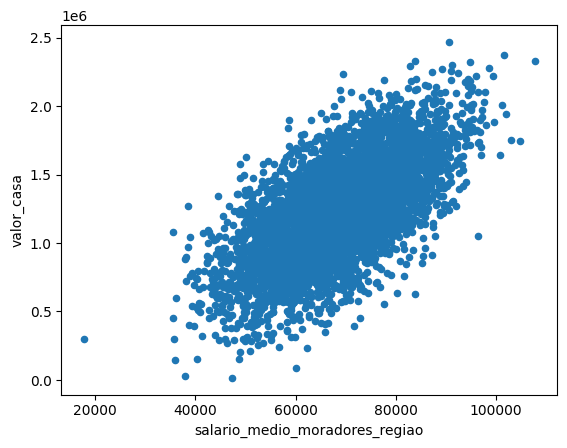

In [5]:
df.plot(kind="scatter", x = "salario_medio_moradores_regiao", y="valor_casa")

<Axes: >

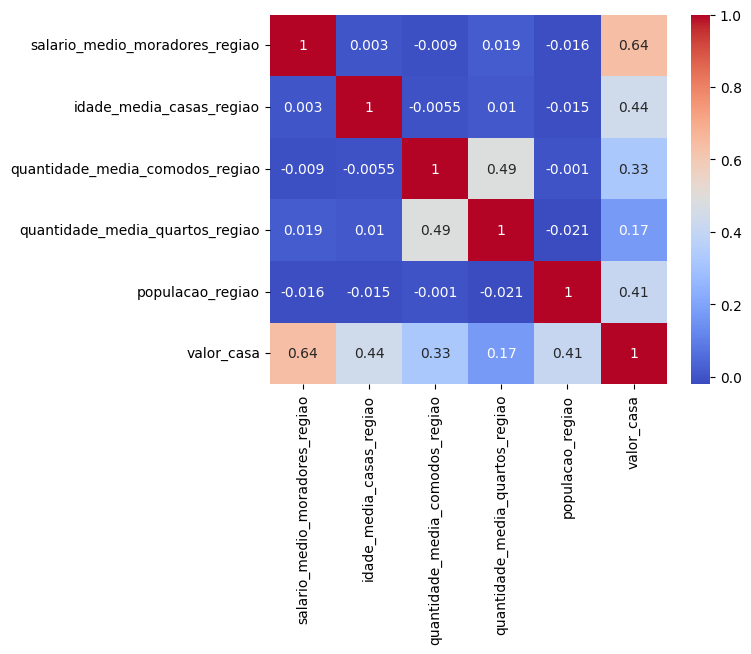

In [7]:
correlacao = df.corr()
sns.heatmap(correlacao, annot=True, cmap="coolwarm")

In [13]:
X = df.drop(columns="valor_casa")
y = df["valor_casa"]

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
from sklearn.linear_model import LinearRegression

modelo1 = LinearRegression()

In [39]:
modelo1.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [40]:
modelo1.intercept_

np.float64(-2345406.559264111)

In [41]:
modelo1.coef_

array([2.15626290e+01, 1.50590200e+05, 1.10584886e+05, 1.64449809e+03,
       1.51725318e+01])

In [42]:
X_train.head(1)

,salario_medio_moradores_regiao,idade_media_casas_regiao,quantidade_media_comodos_regiao,quantidade_media_quartos_regiao,populacao_regiao
4227,66547,5,6,4,27850


In [23]:
y_train.head(1)

4227    1094880
Name: valor_casa, dtype: int64

In [43]:
a = 66547
b = 5
c = 6
d = 4
e = 27850

teste= [a,b,c,d,e]
modelo1.predict([teste])

C:\Users\theeu\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([935115.02823632])

In [25]:
935115.02823632 - 1094880

-159764.97176368

In [44]:
from sklearn.ensemble import RandomForestRegressor

modelo2 = RandomForestRegressor()

modelo2.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [45]:
modelo2.predict([teste])

C:\Users\theeu\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([1049495.42])

In [47]:
1049495.4 - 1094880

-45384.60000000009

In [48]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error


In [49]:
predicoes1 = modelo1.predict(X_test)
predicoes2 = modelo2.predict(X_test)

In [50]:
r2_score(y_test, predicoes1)


0.889244894520208

In [51]:
r2_score(y_test, predicoes2)

0.8408757283685377

In [52]:
print(mean_absolute_error(y_test, predicoes1))
print(mean_absolute_error(y_test, predicoes2))

93564.18067602566
109641.01872


In [53]:
print(mean_squared_error(y_test, predicoes1))
print(mean_squared_error(y_test, predicoes2))

13626473635.029324
19577451375.14213


In [55]:
print(mean_absolute_percentage_error(y_test, predicoes1))
print(mean_absolute_percentage_error(y_test, predicoes2))

0.08575122090340011
0.10158528658129742


In [ ]:
# Teste com feature scaling
# Feature scaling + model training/evaluation (cleaned and formatted)
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    r2_score,
    mean_absolute_error,
    mean_squared_error,
    mean_absolute_percentage_error,
)

# Create scaler and scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit models on scaled data (retraining existing estimators)
# If you prefer to keep the original unscaled models, clone them first from sklearn.base import clone
modelo1.fit(X_train_scaled, y_train)
modelo2.fit(X_train_scaled, y_train)

# Predict on scaled test set
predicoes1_scaled = modelo1.predict(X_test_scaled)
predicoes2_scaled = modelo2.predict(X_test_scaled)

# Helper to print metrics neatly
def print_metrics(name, y_true, y_pred):
    print(f"--- {name} ---")
    print(f"R2:  {r2_score(y_true, y_pred):.4f}")
    print(f"MAE: {mean_absolute_error(y_true, y_pred):.4f}")
    print(f"MSE: {mean_squared_error(y_true, y_pred):.4f}")
    print(f"MAPE:{mean_absolute_percentage_error(y_true, y_pred):.4f}")
    print()

print("Resultados com Feature Scaling:")
print_metrics("Regressão Linear", y_test, predicoes1_scaled)
print_metrics("Random Forest", y_test, predicoes2_scaled)


Resultados com Feature Scaling:
--- Regressão Linear ---
R2:  0.8892
MAE: 93564.1807
MSE: 13626473635.0294
MAPE:0.0858

--- Random Forest ---
R2:  0.8445
MAE: 108419.0196
MSE: 19133861406.7464
MAPE:0.1007

